## Certified Specialist in Machine Learning and Artificial Intelligence

### Emotion Detection in Twitter Data using NLP Techniques

#### Prepared by Amritha R J

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
import seaborn as sns
import re
import warnings
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import confusion_matrix, classification_report
warnings.filterwarnings("ignore")

In [2]:
# Reading the dataset

df = pd.read_csv(r'C:\Users\AMRITHA R J\Downloads\tweet_emotions .csv')

In [3]:
# Dataframe

df

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
...,...,...,...
39995,1753918954,neutral,@JohnLloydTaylor
39996,1753919001,love,Happy Mothers Day All my love
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


### Data preprocessing and data preparation

In [4]:
# First 5 rows of the dataframe

df.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [5]:
# Last 5 rows of the dataframe

df.tail()

,tweet_id,sentiment,content
39995,1753918954,neutral,@JohnLloydTaylor
39996,1753919001,love,Happy Mothers Day All my love
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...
39999,1753919049,love,@mopedronin bullet train from tokyo the gf ...


In [6]:
#No. of rows and columns in the dataframe

df.shape

(40000, 3)

In [7]:
#List of all columns present in the dataframe

df.columns

Index(['tweet_id', 'sentiment', 'content'], dtype='object')

In [8]:
#Checking for duplicate values

df.duplicated().sum()

0

In [9]:
#No. of unique values

df.nunique()

tweet_id     40000
sentiment       13
content      39827
dtype: int64

There are 13 different sentiments and 40000 different tweet_id

In [10]:
# Data types

df.dtypes

tweet_id      int64
sentiment    object
content      object
dtype: object

In [11]:
# Information about the structure of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   content    40000 non-null  object
dtypes: int64(1), object(2)
memory usage: 937.6+ KB


<AxesSubplot:xlabel='sentiment', ylabel='count'>

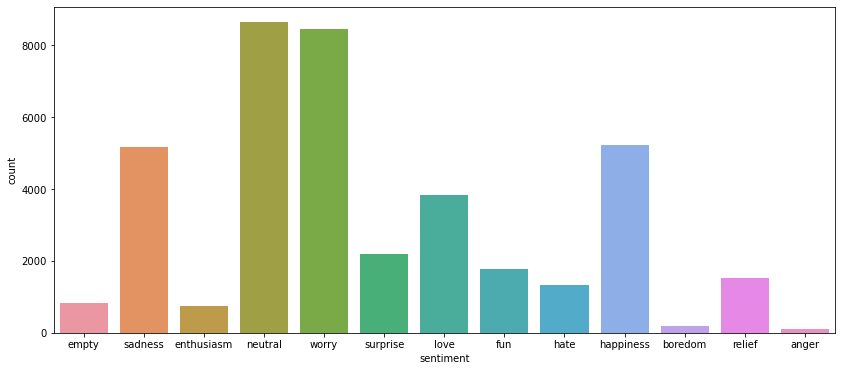

In [12]:
# Bar plot

# Set the size of the plot
plt.figure(figsize=(14, 6))


# Create the countplot
sns.countplot(x='sentiment', data=df)

In [13]:
# Describe the data

df.describe()

,tweet_id
count,4.000000e+04
mean,1.845184e+09
std,1.188579e+08
min,1.693956e+09
25%,1.751431e+09
50%,1.855443e+09
75%,1.962781e+09
max,1.966441e+09


In [14]:
# Print the count and the ratio of the emotions

pd.DataFrame([df.sentiment.value_counts(), df.sentiment.value_counts(normalize=True)]).T

,sentiment,sentiment
neutral,8638.0,0.215950
worry,8459.0,0.211475
happiness,5209.0,0.130225
sadness,5165.0,0.129125
love,3842.0,0.096050
surprise,2187.0,0.054675
fun,1776.0,0.044400
relief,1526.0,0.038150
hate,1323.0,0.033075
empty,827.0,0.020675


This indicates that the most occurred sentiment is neutral with a count of 8638 and the least occurred sentiment is anger with a count of 110. 21.6% of sentiments are neutral sentiments and 0.3% sentiments are anger

Exploring undetected sentiments: 
Empty cannot be considered as a sentiment. So lets dig deep into it

In [15]:
# Print tweets with sentiment "empty"

df[df.sentiment == 'empty'].head(10)

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
44,1956978276,empty,@creyes middle school and elem. High schools w...
52,1956979917,empty,@djmicdamn hey yu lil fucker i textd yu
141,1957000336,empty,@softtouchme just answered you- never learned ...
180,1957007357,empty,Have a headache I'm going to bed. Goodnight!
203,1957012535,empty,@DymeDiva23 Nite. Now I'm up n bored as oppose...
238,1957018678,empty,"@TheTombert i was watching Harpers Island, lol..."
244,1957019766,empty,@tarng Trudy's off Burnet...the one up north t...
272,1957027841,empty,@msz_rockstar umm how bout em?..aint get 2 see...
339,1957042579,empty,I need to be sleeping.. But i'm not even tired..


In [16]:
# Print tweets with sentiment "neutral"

df[df.sentiment == 'neutral'].head(10)

,tweet_id,sentiment,content
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
10,1956969456,neutral,cant fall asleep
22,1956972116,neutral,No Topic Maps talks at the Balisage Markup Con...
31,1956975441,neutral,@cynthia_123 i cant sleep
32,1956975860,neutral,I missed the bl***y bus!!!!!!!!
33,1956975876,neutral,feels strong contractions but wants to go out....
34,1956975927,neutral,SoCal! stoked. or maybe not.. tomorrow
35,1956976187,neutral,Screw you @davidbrussee! I only have 3 weeks...
38,1956976557,neutral,has work this afternoon
39,1956976681,neutral,@GABBYiSACTiVE Aw you would not unfollow me wo...


Now it is know that empty sentiment is not similar to neutral sentiment. Also it cannot be considered as anger, happy, sad, fun etc sentiments. Empty sentiment is a mix of numerous sentiments

In [17]:
# Drop rows with sentiment "empty" as it is not a particular sentiment but a mix of sentiments

df = df[df['sentiment'] != "empty"]

In [18]:
# New dataframe

df

,tweet_id,sentiment,content
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
5,1956968477,worry,Re-pinging @ghostridah14: why didn't you go to...
...,...,...,...
39995,1753918954,neutral,@JohnLloydTaylor
39996,1753919001,love,Happy Mothers Day All my love
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [19]:
# Repeated tweets

df.content.value_counts()[df.content.value_counts()>1]

I just received a mothers day card from my lovely daughter wishing my a happy mothers day  http://tr.im/kWK9    14
FREE UNLIMITED RINGTONES!!! - http://tinyurl.com/freeringring - USA ONLY - Awesome 4 iphone                     12
Happy Mother's Day!                                                                                             10
Happy Mothers Day                                                                                               10
happy mother's day                                                                                               8
                                                                                                                ..
i wanna go home                                                                                                  2
happy mothers day!                                                                                               2
not feeling too great today                                                     

This indicates that there exist multiple tweets with the same content. "I just received a mothers day card from my lovely daughter wishing my a happy mothers day  http://tr.im/kWK9" is the most repeated tweet

In [20]:
# Tweets with same content

df[df.content=='I just received a mothers day card from my lovely daughter wishing my a happy mothers day  http://tr.im/kWK9']

,tweet_id,sentiment,content
33496,1752619550,love,I just received a mothers day card from my lov...
33693,1752674435,love,I just received a mothers day card from my lov...
33874,1752725133,worry,I just received a mothers day card from my lov...
34071,1752774341,love,I just received a mothers day card from my lov...
34298,1752824798,love,I just received a mothers day card from my lov...
34480,1752873814,love,I just received a mothers day card from my lov...
34672,1752920582,love,I just received a mothers day card from my lov...
34861,1752965288,love,I just received a mothers day card from my lov...
35051,1753009856,love,I just received a mothers day card from my lov...
35232,1753052362,love,I just received a mothers day card from my lov...


Here the same content shows 2 different sentiments

In [21]:
# Number of duplicated tweets

df.content.duplicated().sum()

167

Polarity

In [22]:
df['sentiment'].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

In [23]:
# Creating a dictionary to map sentiments to polarity.

senti_dict = {'boredom': 'negative',
                  'hate': 'negative',
                  'sadness': 'negative',
                  'anger': 'negative',
                  'worry': 'negative',
                  'relief': 'positive',
                  'happiness': 'positive',
                  'love': 'positive',
                  'enthusiasm': 'positive',
                  'neutral': 'neutral',
                  'surprise':'positive',
                  'fun': 'positive'
                 }
df['polarity'] = df.sentiment.map(senti_dict)

In [24]:
df

,tweet_id,sentiment,content,polarity
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,negative
2,1956967696,sadness,Funeral ceremony...gloomy friday...,negative
3,1956967789,enthusiasm,wants to hang out with friends SOON!,positive
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,neutral
5,1956968477,worry,Re-pinging @ghostridah14: why didn't you go to...,negative
...,...,...,...,...
39995,1753918954,neutral,@JohnLloydTaylor,neutral
39996,1753919001,love,Happy Mothers Day All my love,positive
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...,positive
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,positive


In [25]:
# Finding the polarity of tweets

df.polarity.value_counts()

positive    15299
negative    15236
neutral      8638
Name: polarity, dtype: int64

In [26]:
# Finding the percentage of tweets that has mentions in it

df.content.str.contains("@\w+").mean()*100

47.36170321394838

More than 47% of tweets have mentions

In [27]:
# Tweets that contain "hashtags"

df.content.str.contains("#\w+").mean()

0.01993720164398948

This indicates that only a few tweets contains '#'

In [28]:
# Create a feature char_count

df['char_count'] = df['content'].apply(len)

In [29]:
df[df.char_count>140].head()

,tweet_id,sentiment,content,polarity,char_count
79,1956985758,worry,@shondarhimes Sure you will tweet about this w...,negative,148
89,1956987950,worry,.. I'm suppposed to be sleep. But i got some m...,negative,151
371,1957050890,sadness,@imjustlalayone damn girl I'm so down but ya g...,negative,145
635,1957114604,hate,"back at Vienna ( ), sooo tired, luggage lost,...",negative,141
660,1957119780,love,"@IkramShahnawaz Oh I love 'em, but when I thin...",positive,147


In [30]:
# Print tweets with less than 5 characters

df[df.char_count<5]

,tweet_id,sentiment,content,polarity,char_count
15028,1964712204,neutral,0,neutral,1
29869,1751394197,neutral,0,neutral,1
39415,1753819910,neutral,0,neutral,1


In [31]:
# Drop rows with only one character

df.drop(df[df.content.str.len()<5].index, inplace=True)

In [32]:
# Detect the tweets that contains only mentions

df[df.content.str.replace("@\w+", "").str.len()<2].head()

,tweet_id,sentiment,content,polarity,char_count
659,1957119180,neutral,@Joshuah_Pearson,neutral,16
664,1957120767,neutral,@emlevins,neutral,9
3181,1957722271,neutral,@Clumsyflic,neutral,11
4865,1960537578,neutral,@philleasfogg,neutral,13
4933,1960562456,neutral,@WillKnott,neutral,10


In [33]:
# Print tweets with only mentions (and + 0, or 1 characters)

df[df.content.str.replace("@[\w|\d|_]+", "").str.len()<2].sample(10)

,tweet_id,sentiment,content,polarity,char_count
20665,1694089759,neutral,@DJWiLLGATES,neutral,12
15941,1965075774,neutral,@TheMakeupSnob,neutral,14
13810,1964212128,neutral,@mcraddictal,neutral,12
18153,1965897956,neutral,@Mashon96,neutral,9
6914,1961486491,worry,@lets_eat_out,negative,13
4933,1960562456,neutral,@WillKnott,neutral,10
28789,1750965990,neutral,@sburkhead,neutral,10
26782,1695544789,neutral,@TheDailyBlonde,neutral,15
30257,1751536720,neutral,@mcraddictal,neutral,12
23415,1694608833,neutral,@leepovey,neutral,9


In [34]:
# Number of tweets with only mentions bu no other text

df[df.content.str.replace("@[\w|\d|_]+", "").str.len()<2].shape[0]

65

In [35]:
# Number of tweets with only mentions but no other text

df[df.content.str.replace("@[^\s]+", "").str.len()<2].shape[0]

66

In [36]:
# Change sentiment of the tweets with only mentions to "neutral"

df.loc[df.content.str.replace("@[^\s]+", "").str.len()<3, 'sentiment'] = "neutral"

In [37]:
# Hyperlinks

In [38]:
# Number/ratio of tweets with hyperlinks

df.content.str.lower().str.contains("http").agg([np.sum, np.mean])

sum     1762.000000
mean       0.044983
Name: content, dtype: float64

In [39]:
df[df.content.str.lower().str.contains("http")].sentiment.value_counts(normalize=True)

neutral       0.307037
worry         0.148127
happiness     0.145857
love          0.125426
sadness       0.081725
fun           0.060726
surprise      0.056754
relief        0.029512
hate          0.021566
enthusiasm    0.019864
anger         0.002270
boredom       0.001135
Name: sentiment, dtype: float64

In [40]:
df[~df.content.str.contains("http")].sentiment.value_counts(normalize=True)

worry         0.219017
neutral       0.216638
sadness       0.134142
happiness     0.132351
love          0.096771
surprise      0.055790
fun           0.044616
relief        0.039403
hate          0.034351
enthusiasm    0.019354
boredom       0.004732
anger         0.002834
Name: sentiment, dtype: float64

In [41]:
# Create a new column "has_link"

df['has_link'] = df.content.str.contains("http")*1

In [42]:
# Detect tweets which contain only links

df[df.content.str.replace(r'http[^\s]+', 'HTTP').str.len()<10]

,tweet_id,sentiment,content,polarity,char_count,has_link
664,1957120767,neutral,@emlevins,neutral,9,0
1007,1957194802,sadness,not well,negative,8,0
1472,1957315651,neutral,lonely ..,neutral,9,0
1538,1957333169,neutral,Hangover,neutral,8,0
1821,1957405143,neutral,So tired.,neutral,9,0
...,...,...,...,...,...,...
37457,1753485201,neutral,bbq party,neutral,9,0
37602,1753517154,relief,I Got it!,positive,9,0
37646,1753518699,happiness,chilling,positive,8,0
37706,1753533288,neutral,Howdyyy,neutral,7,0


In [43]:
# Punctuations

In [44]:
# Look for exclamation point !

df.content.str.contains("!").mean()

0.2945111054378351

In [45]:
df[df.content.str.contains("!")].head()

,tweet_id,sentiment,content,polarity,char_count,has_link
3,1956967789,enthusiasm,wants to hang out with friends SOON!,positive,36,0
6,1956968487,sadness,"I should be sleep, but im not! thinking about ...",negative,132,0
12,1956970047,sadness,Ugh! I have to beat this stupid song to get to...,negative,62,0
20,1956971981,worry,@raaaaaaek oh too bad! I hope it gets better. ...,negative,86,0
26,1956972557,sadness,@IsaacMascote i'm sorry people are so rude to...,negative,123,0


In [46]:
# Value counts for "!"

df[df.content.str.contains("!")].sentiment.value_counts(normalize=True)

happiness     0.204317
worry         0.181952
neutral       0.138263
love          0.132975
sadness       0.107576
surprise      0.067961
fun           0.059813
relief        0.039442
hate          0.035801
enthusiasm    0.025399
boredom       0.003381
anger         0.003121
Name: sentiment, dtype: float64

In [47]:
df.sentiment.value_counts(normalize=True)

neutral       0.220705
worry         0.215828
happiness     0.132959
sadness       0.131785
love          0.098060
surprise      0.055834
fun           0.045341
relief        0.038958
hate          0.033776
enthusiasm    0.019377
boredom       0.004570
anger         0.002808
Name: sentiment, dtype: float64

In [48]:
# Distribution of ! among emotions

df.groupby('sentiment').content.apply(lambda x: x.str.contains("!").mean()).sort_values()

sentiment
neutral       0.184500
boredom       0.217877
sadness       0.240411
worry         0.248285
relief        0.298165
hate          0.312169
anger         0.327273
surprise      0.358482
enthusiasm    0.386034
fun           0.388514
love          0.399375
happiness     0.452573
Name: content, dtype: float64

In [49]:
# Create a new column "ex_point"

df['ex_point'] = df.content.str.contains("!")*1

In [50]:
# Look for question mark ?

df.content.str.contains("\?").mean()

0.10704620883329079

In [51]:
# Value counts for ?

df[df.content.str.contains("\?")].sentiment.value_counts(normalize=True)

neutral       0.253041
worry         0.247317
surprise      0.102313
sadness       0.101359
happiness     0.093728
love          0.068686
fun           0.047699
hate          0.029573
relief        0.025996
enthusiasm    0.022180
anger         0.004531
boredom       0.003577
Name: sentiment, dtype: float64

In [52]:
# Create a new column "qu_mark"

df['qu_mark'] = df.content.str.contains("\?")*1

In [53]:
# Look for ..

df.content.str.contains("\.\.+").mean()

0.1833290783763084

In [54]:
df[df.content.str.contains(r"\.\.")].head()

,tweet_id,sentiment,content,polarity,char_count,has_link,ex_point,qu_mark
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,negative,60,0,0,0
2,1956967696,sadness,Funeral ceremony...gloomy friday...,negative,35,0,0,0
19,1956971586,sadness,How are YOU convinced that I have always wante...,negative,122,0,0,1
21,1956972097,fun,"Wondering why I'm awake at 7am,writing a new s...",positive,121,0,0,0
23,1956972270,worry,I ate Something I don't know what it is... Why...,negative,82,0,0,0


In [55]:
df[df.content.str.contains("\.\.+")].sentiment.value_counts(normalize=True)

worry         0.242445
neutral       0.181451
sadness       0.160980
happiness     0.119482
love          0.086617
surprise      0.058905
fun           0.045815
relief        0.042055
hate          0.036207
enthusiasm    0.017825
boredom       0.005570
anger         0.002646
Name: sentiment, dtype: float64

In [56]:
# Distribution of ! among emotions

df.groupby('sentiment').content.apply(lambda x: x.str.contains("\.\.+").mean()).sort_values()

sentiment
neutral       0.150723
love          0.161937
happiness     0.164747
enthusiasm    0.168643
anger         0.172727
fun           0.185248
surprise      0.193416
hate          0.196523
relief        0.197903
worry         0.205938
boredom       0.223464
sadness       0.223944
Name: content, dtype: float64

In [57]:
# Create a new column "multi_period"

df['multi_period'] = df.content.str.contains("\.\.+")*1

In [58]:
# User defined functions

def preprocess_tweet(tweet):
    
    # To lowercase (not good for VADER)
    tweet = tweet.lower()
    
    # Remove HTML special entities (e.g. &amp;)
    tweet = re.sub(r'\&\w*;', '', tweet)
    
    #Convert @username to "@user"
    tweet = re.sub('@[^\s]+','@user',tweet)
    
    # Remove whitespace (including new line characters)
    tweet = re.sub(r'\s\s+', ' ', tweet)
    
    # Remove single space remaining at the front of the tweet.
    tweet = tweet.lstrip(' ')
    
    # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    tweet = ''.join(c for c in tweet if c <= '\uFFFF')
    
    # Convert hyperlinks ->>>> For now just replace with http
    tweet = re.sub(r'https?:\/\/.*\/\w*', 'http', tweet)

    return tweet

# Preprocess "content"
df['content'] = df.content.apply(preprocess_tweet)

### Feature Engineering

In [59]:
# Create a sentiment dictionary to map EMOTIONS to SENTIMENTS.

sentiment_dict = {'boredom': 'negative',
                  'hate': 'negative',
                  'sadness': 'negative',
                  'anger': 'negative',
                  'worry': 'negative',
                  'relief': 'positive',
                # 'empty': 'neutral',
                  'happiness': 'positive',
                  'love': 'positive',
                  'enthusiasm': 'positive',
                  'neutral': 'neutral',
                  'surprise':'positive',
                  'fun': 'positive'
                 }

# Create a feature "polarity"
df['polarity'] = df.sentiment.map(sentiment_dict)

In [60]:
# User defined functions

def count_mentions(text):
    '''Returns number of mentions in a string.'''
    
    # Split the string into words
    words = text.split()
    
    # Create a list of words that are mentions
    mentions = [word for word in words if word.startswith("@")]
    
    # Return number of mentions
    return(len(mentions))

# Create a feature "mention_count"
df['mention_count'] = df['content'].apply(count_mentions)

In [61]:
# User defined functions

def count_hashtags(text):
    '''Returns number of hashtags in a text.'''
    
    # Split the string into words
    words = text.split()
    
    # Create a list of words that are hashtags
    hashtags = [word for word in words if word.startswith("#")]
    
    # Return number of hashtags
    return(len(hashtags))

# Create a feature "hashtag_count"
df['hashtag_count'] = df['content'].apply(count_hashtags)

In [62]:
# Create a feature char_count
df['char_count'] = df['content'].apply(len)

# Create a new column "has_link"
df['has_link'] = df.content.str.contains("http")*1

# Create a new column "ex_point"
df['ex_point'] = df.content.str.contains("!")*1

# Create a new column "qu_mark"
df['qu_mark'] = df.content.str.contains("\?")*1

# Create a new column "multi_period"
df['multi_period'] = df.content.str.contains("\.\.+")*1

In [63]:
df.head()

,tweet_id,sentiment,content,polarity,char_count,has_link,ex_point,qu_mark,multi_period,mention_count,hashtag_count
1,1956967666,sadness,layin n bed with a headache ughhhh...waitin on...,negative,59,0,0,0,1,0,0
2,1956967696,sadness,funeral ceremony...gloomy friday...,negative,35,0,0,0,1,0,0
3,1956967789,enthusiasm,wants to hang out with friends soon!,positive,36,0,1,0,0,0,0
4,1956968416,neutral,@user we want to trade with someone who has ho...,neutral,77,0,0,0,0,1,0
5,1956968477,worry,re-pinging @user why didn't you go to prom? bc...,negative,75,0,0,1,0,1,0


In [64]:
df.shape

(39170, 11)

### Model building and performance evaluation

In [65]:
# Create features and target

X = df.drop(['sentiment', 'polarity'], axis=1)
y = df.sentiment

# Split training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=57)

In [66]:
# Vectorizing Tweets

In [67]:
# Initialize count vectorizer
count_vectorizer = CountVectorizer(stop_words='english', strip_accents='ascii',
                                  min_df=.001)

# Create count train and test variables
X_train_bow = count_vectorizer.fit_transform(X_train.content)
X_test_bow = count_vectorizer.transform(X_test.content)

# Convert matrices into a DataFrame
X_train_bow_df = pd.DataFrame(X_train_bow.toarray())
X_test_bow_df = pd.DataFrame(X_test_bow.toarray())

# Map the column names to vocabulary 
X_train_bow_df.columns = count_vectorizer.get_feature_names()
X_test_bow_df.columns = count_vectorizer.get_feature_names()

Multinomial Naive Bayes Model

In [68]:
# Drop 'content'
X_train.drop('content', axis=1, inplace=True)
X_test.drop('content', axis=1, inplace=True)

# Merge data
X_train = X_train.reset_index(drop=True).join(X_train_bow_df)
X_test = X_test.reset_index(drop=True).join(X_test_bow_df)
X_test.fillna(0, inplace=True)

In [69]:
# Based on emotions

# Create a MulitnomialNB model

from sklearn.naive_bayes import MultinomialNB
clf_nb = MultinomialNB()

clf_nb.fit(X_train, y_train)

# Run predict on count test data to get predictions
count_nb_pred = clf_nb.predict(X_test)

# Calculate the accuracy of predictions
count_nb_score = clf_nb.score(X_test, y_test)

print('NaiveBayes Count Score: ', count_nb_score, '\n')
print(confusion_matrix(y_test, count_nb_pred, labels=y.unique()))

NaiveBayes Count Score:  0.25640763810885325 

[[ 133    3  578  237    8   18  168   30   46    1   50    0]
 [   8    1   75   20    5    3   39    4   22    0    4    0]
 [  30    6 1319  219   19   46  318   13  141    0   70    0]
 [  97    7  916  421   18   27  341   35  113    1   96    0]
 [  15    1  256   63   14   20   89    3   58    0   25    0]
 [  16    2  364   35    7  189  155    7  123    0   48    0]
 [   6    3  163   46    4   10  119    3   67    0   15    0]
 [  16    0  152   67    0    2   60   42   10    0    7    0]
 [  13    2  547   88    8   96  275    5  233    0   71    0]
 [   4    0   20    9    0    0   11    4    1    0    3    0]
 [  11    1  163   47    2   17   54    3   47    0   40    0]
 [   1    0   12    4    2    1    7    1    1    0    1    0]]


In [70]:
# Print Confusion Matrix

labels = np.unique(y_test)
cm =  confusion_matrix(y_test, count_nb_pred, labels=labels)
pd.DataFrame(cm, index=labels, columns=labels)

,anger,boredom,enthusiasm,fun,happiness,hate,love,neutral,relief,sadness,surprise,worry
anger,0,0,0,7,1,1,1,12,1,1,2,4
boredom,0,0,0,11,1,4,0,20,3,4,0,9
enthusiasm,0,0,1,39,22,4,3,75,4,8,5,20
fun,0,0,3,119,67,3,10,163,15,6,4,46
happiness,0,0,2,275,233,5,96,547,71,13,8,88
hate,0,0,0,60,10,42,2,152,7,16,0,67
love,0,0,2,155,123,7,189,364,48,16,7,35
neutral,0,0,6,318,141,13,46,1319,70,30,19,219
relief,0,0,1,54,47,3,17,163,40,11,2,47
sadness,0,1,3,168,46,30,18,578,50,133,8,237


In [71]:
# Based on polarity

# Create features and target
X = df.drop(['sentiment', 'polarity'], axis=1)
y = df.polarity

# Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=57)

# Initialize count vectorizer
count_vectorizer = CountVectorizer(stop_words='english', strip_accents='ascii',
                                  min_df=.001)

# Create count train and test variables
X_train_bow = count_vectorizer.fit_transform(X_train.content)
X_test_bow = count_vectorizer.transform(X_test.content)

# Convert matrices into a DataFrame
X_train_bow_df = pd.DataFrame(X_train_bow.toarray())
X_test_bow_df = pd.DataFrame(X_test_bow.toarray())

# Map the column names to vocabulary 
X_train_bow_df.columns = count_vectorizer.get_feature_names()
X_test_bow_df.columns = count_vectorizer.get_feature_names()

# Drop 'content'
X_train.drop('content', axis=1, inplace=True)
X_test.drop('content', axis=1, inplace=True)

# Merge data
X_train = X_train.reset_index(drop=True).join(X_train_bow_df)
X_test = X_test.reset_index(drop=True).join(X_test_bow_df)
X_test.fillna(0, inplace=True)

# Create a MulitnomialNB model
clf_nb = MultinomialNB()

clf_nb.fit(X_train, y_train)

# Run predict on count test data to get predictions
count_nb_pred = clf_nb.predict(X_test)

# Calculate the accuracy of predictions
count_nb_score = clf_nb.score(X_test, y_test)

print('NaiveBayes Count Score: ', count_nb_score, '\n')
print(confusion_matrix(y_test, count_nb_pred, labels=y.unique()))

NaiveBayes Count Score:  0.45604002859185133 

[[1211  992 1579]
 [ 383 1979 1468]
 [ 273  632 1276]]


In [72]:
# TfidfVectorizer

In [73]:
# Create features and target

X = df.drop(['sentiment', 'polarity'], axis=1)
y = df.sentiment

# Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=57)

In [74]:
# Initialize tfidf vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', min_df=100)

# Create tfidf train and test variables
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train.content) 
X_test_tfidf = tfidf_vectorizer.transform(X_test.content)

Multinomial Naive Bayes Model

In [75]:
# Create a MulitnomialNB model

tfidf_nb = MultinomialNB()

tfidf_nb.fit(X_train_tfidf, y_train)

# Run predict on TF-IDF test data to get predictions
tfidf_nb_pred = tfidf_nb.predict(X_test_tfidf)

# Calculate the accuracy of predictions
tfidf_nb_score = tfidf_nb.score(X_test_tfidf, y_test)

print('NaiveBayes Tfidf Score: ', tfidf_nb_score)

NaiveBayes Tfidf Score:  0.3243132849994894


In [76]:
# Print Confusion Matrix

labels = np.unique(y_test)
cm =  confusion_matrix(y_test, tfidf_nb_pred, labels=labels)
pd.DataFrame(cm, index=labels, columns=labels)

,anger,boredom,enthusiasm,fun,happiness,hate,love,neutral,relief,sadness,surprise,worry
anger,0,0,0,0,0,0,1,13,0,2,0,14
boredom,0,0,0,1,1,0,2,16,0,6,0,26
enthusiasm,0,0,0,0,17,0,10,83,0,6,1,64
fun,0,0,0,1,84,0,12,203,0,4,0,132
happiness,0,0,0,0,332,1,120,540,7,10,5,323
hate,0,0,0,0,8,20,7,117,0,30,0,174
love,0,0,0,0,164,0,279,313,1,10,1,178
neutral,0,0,0,0,115,1,74,1326,2,41,2,620
relief,0,0,0,0,53,1,20,179,4,8,0,120
sadness,0,0,0,0,35,5,21,394,1,154,5,657


Linear SVC Model

In [77]:
#Based on emotions

# Create a LinearSVC model
tfidf_svc = LinearSVC()

# Train model
tfidf_svc.fit(X_train_tfidf, y_train)

# Run predict on tfidf test data to get predictions
tfidf_svc_pred = tfidf_svc.predict(X_test_tfidf)

# Calculate accuracy using the metrics module
tfidf_svc_score = tfidf_svc.score(X_test_tfidf, y_test)

print("LinearSVC Score:   %0.3f" % tfidf_svc_score)

# Print Confusion Matrix
labels = np.unique(y_test)
cm =  confusion_matrix(y_test, tfidf_svc_pred, labels=labels)
pd.DataFrame(cm, index=labels, columns=labels)

LinearSVC Score:   0.341


,anger,boredom,enthusiasm,fun,happiness,hate,love,neutral,relief,sadness,surprise,worry
anger,0,0,0,0,2,0,0,13,0,2,0,13
boredom,0,0,0,1,3,0,1,17,0,10,0,20
enthusiasm,0,0,0,1,35,1,10,67,1,12,3,51
fun,0,0,0,4,119,0,19,164,0,24,2,104
happiness,0,0,0,4,466,1,138,422,18,30,7,252
hate,0,0,0,1,15,44,7,113,1,47,2,126
love,0,0,0,2,203,3,361,222,2,24,2,127
neutral,0,0,0,2,188,4,85,1262,7,87,3,543
relief,0,0,0,0,81,2,26,146,14,18,2,96
sadness,0,0,0,3,72,16,42,369,2,263,6,499


In [78]:
# Based on polarity

# Create features and target
X = df.drop(['sentiment', 'polarity'], axis=1)
y = df.polarity

# Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=57)

# Initialize tfidf vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', min_df=100)

# Create tfidf train and test variables
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train.content) 
X_test_tfidf = tfidf_vectorizer.transform(X_test.content)

# Create a LinearSVC model
tfidf_svc = LinearSVC()

# Train model
tfidf_svc.fit(X_train_tfidf, y_train)

# Run predict on tfidf test data to get predictions
tfidf_svc_pred = tfidf_svc.predict(X_test_tfidf)

# Calculate accuracy using the metrics module
tfidf_svc_score = tfidf_svc.score(X_test_tfidf, y_test)

print("LinearSVC Score:   %0.3f" % tfidf_svc_score)

# Print Confusion Matrix
labels = np.unique(y_test)
cm =  confusion_matrix(y_test, tfidf_svc_pred, labels=labels)
pd.DataFrame(cm, index=labels, columns=labels)

LinearSVC Score:   0.561


,negative,neutral,positive
negative,2632,291,859
neutral,1031,448,702
positive,1135,286,2409
